## Punto 1D:
Realice gr ́aficas de I(λ, T) vs T para T=100K, 5800K, 120000K. Adjunte el c ́odigo que utiliz ́o paraesto e identifique los m ́aximos seg ́un la ley de Wien.  Debe subir su c ́odigo a GitHub y compartirel link del repositorio para comparar su c ́odigo con el de otros estudiantes o con I.A.Nota:  Nose  reciben  c ́odigos  obtenidos  por  ChatGPT,  Google  Gemini,  Blackbox  AI,  GitHubCopilot, etc

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [ ]:
h = 6.62607015e-34  # Constante de Planck (J·s)
c = 2.99792458e8    # Velocidad de la luz (m/s)
k = 1.380649e-23    # Constante de Boltzmann (J/K)
b = 2.8977719e-3    # Constante de Wien (m·K)
temperatures = [100, 5800, 120000]  # En Kelvin

Temperatura: 100 K -> Pico máximo en: 29029.94 nm con método numérico, Intensidad: 4.09e+04 W/m^2·m
Error absoluto: 52.21212432432003
Error relativo: 0.0018018018018016535


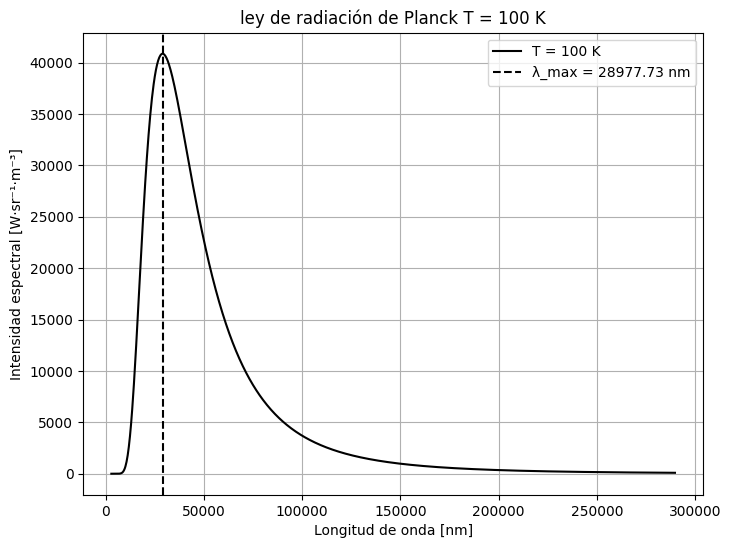

Temperatura: 5800 K -> Pico máximo en: 500.52 nm con método numérico, Intensidad: 2.68e+13 W/m^2·m
Error absoluto: 0.9002090400745715
Error relativo: 0.00180180180180183


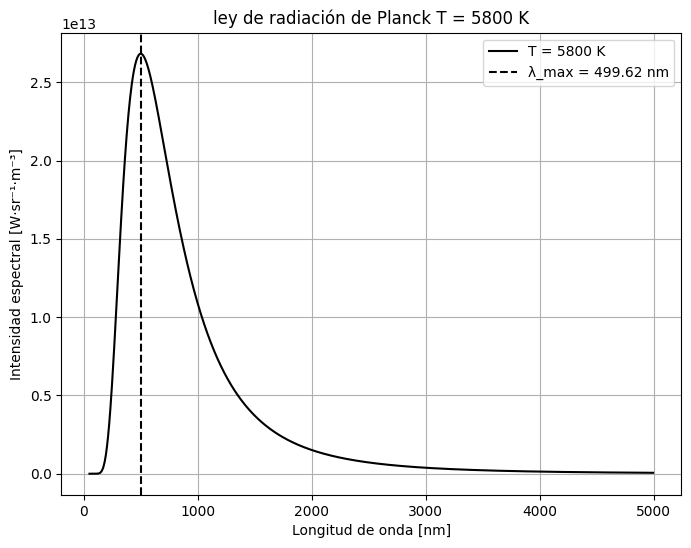

Temperatura: 120000 K -> Pico máximo en: 24.19 nm con método numérico, Intensidad: 1.02e+20 W/m^2·m
Error absoluto: 0.04351010360360519
Error relativo: 0.0018018018018018673


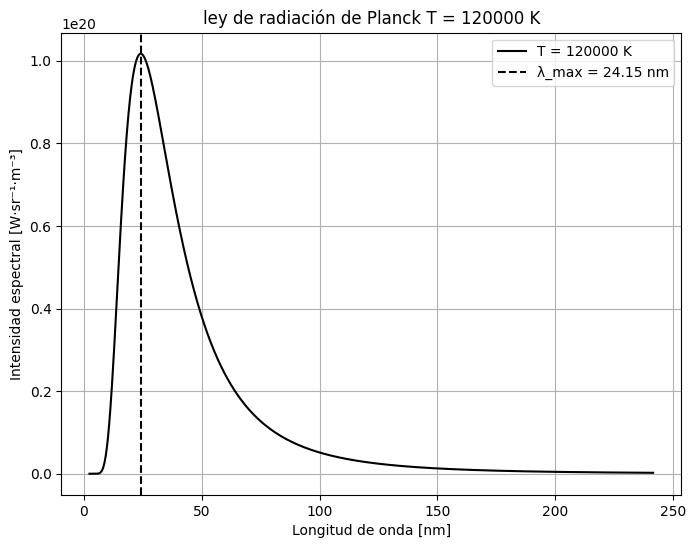

In [28]:
def Intensidad(wavelength, T):
    return (2 * h * c**2) / (wavelength**5 * (np.exp((h * c) / (wavelength * k * T)) - 1))

def wien_law(T):
    return b / T

temperatures = [100, 5800, 120000]

for T in temperatures:
    lambda_max = wien_law(T)
    wavelengths = np.linspace(lambda_max * 0.1, lambda_max * 10, 1000)
    intensity = Intensidad(wavelengths, T)

    peaks, _ = find_peaks(intensity)
    max_intensity = intensity[peaks].max()
    max_lambda = wavelengths[peaks][np.argmax(intensity[peaks])] * 1e9

    error_absoluto = abs(max_lambda - lambda_max * 1e9)
    error_relativo = error_absoluto / abs(lambda_max * 1e9)

    print(f"Temperatura: {T} K -> Pico máximo en: {max_lambda:.2f} [nm] con método numérico, Intensidad: {max_intensity:.2e} W/m^2·m")
    print(f"Error absoluto: {error_absoluto}")
    print(f"Error relativo: {error_relativo}")

    plt.figure(figsize=(8, 6))
    plt.plot(wavelengths * 1e9, intensity, label=f'T = {T} K', color='black')
    plt.axvline(lambda_max * 1e9, color='black', linestyle='--', label=f'λ_max = {lambda_max * 1e9:.2f} nm')
    plt.title(f'ley de radiación de Planck T = {T} K')
    plt.xlabel('Longitud de onda [nm]')
    plt.ylabel('Intensidad espectral [W·sr⁻¹·m⁻³]')
    plt.legend()
    plt.grid(True)
    plt.show()

